# Final List of oncRNAs
Here we also visualized loci to break up and narrow down the loci we see.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json as js
import os
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
oncRNAs = pd.read_csv("final_list/top_oncRNAs.bed", header=None, sep="\t")
oncRNAs["length"] = oncRNAs[2] - oncRNAs[1]
oncRNAs

,0,1,2,3,4,5,length
0,chr20,50583874,50583980,chr20:50583874-50583980:+,.,+,106
1,chr9,126882239,126882433,chr9:126882239-126882433:+,.,+,194
2,chr16,15865999,15866029,chr16:15865999-15866029:-,.,-,30
3,chr5,149847906,149847937,chr5:149847906-149847937:+,.,+,31
4,chr1,232287771,232287828,chr1:232287771-232287828:+,.,+,57
...,...,...,...,...,...,...,...
126,chr17,64545314,64545505,chr17:64545314-64545505:-,.,-,191
127,chr10,122350881,122350903,chr10:122350881-122350903:+,.,+,22
128,chr1,43164358,43164482,chr1:43164358-43164482:-,.,-,124
129,chr2,121727242,121727324,chr2:121727242-121727324:-,.,-,82


(array([58., 19.,  9., 19., 11.,  6.,  3.,  1.,  2.,  3.]),
 array([ 18. ,  35.6,  53.2,  70.8,  88.4, 106. , 123.6, 141.2, 158.8,
        176.4, 194. ]),
 <BarContainer object of 10 artists>)

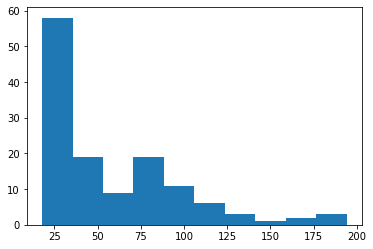

In [3]:
plt.hist(oncRNAs["length"])

# Visualize

In [4]:
loci_coverage_dict = {}
for locus, start, end in zip(oncRNAs[3],oncRNAs[1], oncRNAs[2]):
    length = end-start
    loci_coverage_dict[locus] = [0 for i in range(length)]

In [5]:
cancer_cell_lines = [f for f in os.scandir("final_list/data") if f.name.endswith(".onc.bed") and "HUMEC" not in f.name and "S37" not in f.name]
for f in cancer_cell_lines:
    bed = pd.read_csv(f, header=None, sep="\t")
    for i in range(bed.shape[0]):
        row = bed.iloc[i]
        locus = row[9]
        if locus not in loci_coverage_dict: #Not in our priorized final list.
            continue
        locus_start = row[7]
        locus_end = row[8]
        read_start = row[1]
        read_end = row[2]
        #This maps to the list index for the read. Range works well with bed format as it is end exclusive.
        for i in range(read_start, read_end): 
            pos = i - locus_start
            if pos < 0 or pos >= locus_end - locus_start: #end exclusive
                continue
            loci_coverage_dict[locus][pos] += 1 

Text(0.5, 1.0, 'chr7:139299611-139299712:+ | Length:101')

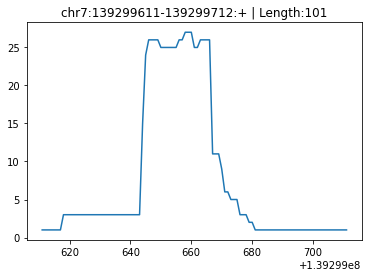

In [321]:
oncRNA = oncRNAs.iloc[93]
locus = oncRNA[3]
splits = locus.split(":")
ref = splits[0]
start = int(splits[1].split("-")[0])
end = int(splits[1].split("-")[1])
strand = splits[2]
coverage = np.array(loci_coverage_dict[locus])
coord = np.arange(start, end)
density_df = pd.DataFrame({"Coord":coord, "Coverage":coverage})
plt.plot(density_df["Coord"], density_df["Coverage"])
plt.title(oncRNA[3] + f" | Length:{end - start}")

In [460]:
split_loci = {"chr20:50583874-50583980:+":["chr20:50583926-50583951:+", "chr20:50583905-50583926:+"],
              "chrX:16712734-16712802:+":["chrX:16712734-16712758:+"],
              "chr2:121727242-121727324:-":["chr2:121727249-121727276:-"],
              "chr1:43164358-43164482:-":["chr1:43164424-43164450:-", "chr1:43164450-43164476:-" ],
              "chr17:64545314-64545505:-":["chr17:64545378-64545408:-"],
              "chr8:143867927-143868000:-":["chr8:143867944-143867977:-"],
              "chr10:59791859-59791902:-":["chr10:59791867-59791902:-"],
              "chr2:236124627-236124800:+":["chr2:236124710-236124730:+", "chr2:236124728-236124756:+", "chr2:236124757-236124796:+"],
              "chr6:57105554-57105620:+":["chr6:57105566-57105593:+"],
              "chr6:52264623-52264696:-":["chr6:52264623-52264650:-"],
              "chr7:36389850-36389931:+":["chr7:36389874-36389905:+"],
              "chr10:32017171-32017214:-":["chr10:32017175-32017211:-"],
              "chr15:34367134-34367165:-":["chr15:34367142-34367165:-"],
              "chr15:40874157-40874234:-":["chr15:40874171-40874194:-", "chr15:40874194-40874223:-"],
              "chr9:113514723-113514767:+":["chr9:113514723-113514758:+"],
              "chr4:1980712-1980744:+":["chr4:1980720-1980744:+"],
              "chr8:29333427-29333464:-":["chr8:29333427-29333460:-"],
              "chr1:179103603-179103641:-":["chr1:179103605-179103641:-"],
              "chr7:139299611-139299712:+":["chr7:139299644-139299673:+"],
              "chr20:62327667-62327746:-":["chr20:62327667-62327693:-"],
              "chr1:84497400-84497524:+":["chr1:84497435-84497468:+", "chr1:84497468-84497495:+"],
              "chr20:50752735-50752776:+":["chr20:50752738-50752775:+"],
              "chr6:149661721-149661811:-":["chr6:149661726-149661760:-"],
              "chr2:102716142-102716211:-":["chr2:102716150-102716188:-"],
              "chr1:149558545-149558588:-":["chr1:149558545-149558569:-"],
              "chr7:92605706-92605776:-":["chr7:92605747-92605776:-"],
              "chr1:200407020-200407123:-":["chr1:200407043-200407080:-"],
              "chr16:21526902-21526948:-":["chr16:21526905-21526945:-"],
              "chrX:127317160-127317210:+":["chrX:127317161-127317185:+", "chrX:127317185-127317210:+"],
              "chr2:111153783-111153820:+":["chr2:111153784-111153814:+"],
              "chr16:15576866-15576966:-":["chr16:15576886-15576925:-"],
              "chr3:172821369-172821477:+":["chr3:172821433-172821476:+"],
              "chr1:156070110-156070162:+":["chr1:156070135-156070162:+"],
              "chr19:10684987-10685034:+":["chr19:10684999-10685031:+"],
              "chr7:29921213-29921331:-":["chr7:29921222-29921260:-"],
              "chr8:143382408-143382439:+":["chr8:143382408-143382435:+"],
              "chr11:63625994-63626105:-":["chr11:63626066-63626096:-"],
              "chr9:126882239-126882433:+":["chr9:126882359-126882390:+"],
              "chr1:232287771-232287828:+":["chr1:232287795-232287828:+"],
              "chr2:237545697-237545743:+":["chr2:237545723-237545743:+"],
              "chr4:55336688-55336863:-":["chr4:55336787-55336827:-"],
              "chr3:179399575-179399631:-":["chr3:179399599-179399629:-"],
              "chr5:154057151-154057189:+":["chr5:154057157-154057189:+"],
              "chr1:226365958-226366045:-":["chr1:226366000-226366035:-"],
              "chr20:56639188-56639276:+":["chr20:56639228-56639252:+"],
              "chr1:156701048-156701120:-":["chr1:156701090-156701120:-"],
              "chr12:46229560-46229641:-":["chr12:46229560-46229586:-"],
              "chr8:143866581-143866679:-":["chr8:143866645-143866679:-"],
              "chr6:50844053-50844173:+":["chr6:50844100-50844135:+"],
              "chr17:39716415-39716514:+":["chr17:39716434-39716477:+"],
              "chr15:41402530-41402603:+":["chr15:41402565-41402590:+"],
              "chr17:63839304-63839336:-":["chr17:63839304-63839325:-"],
              "chr7:38928263-38928289:-":["chr7:38928263-38928284:-"],
              "chr20:9357008-9357103:+":["chr20:9357015-9357034:+", "chr20:9357032-9357052:+", "chr20:9357050-9357077:+",  "chr20:9357075-9357096:+"],
              "chr12:71664021-71664096:+":["chr12:71664059-71664094:+"],
              "chr9:14613887-14613949:-":["chr9:14613909-14613941:-"],
              "chr19:39473382-39473416:+":["chr19:39473388-39473416:+"],
              "chr7:30082319-30082414:+":["chr7:30082357-30082400:+"],
              "chr3:42224520-42224615:+":["chr3:42224521-42224556:+"],
              "chr10:32010001-32010080:-":["chr10:32010017-32010041:-", "chr10:32010039-32010064:-"],
              "chr8:144138633-144138667:+":["chr8:144138633-144138662:+"],
              "chr13:76153225-76153265:-":["chr13:76153228-76153248:-"],
              "chr7:89027754-89027785:-":["chr7:89027755-89027783:-"],
              "chr7:66811360-66811433:+":["chr7:66811362-66811398:+"],
              "chr1:62791710-62791745:+":["chr1:62791725-62791745:+"],
              "chr17:67340363-67340436:-":["chr17:67340381-67340414:-"],
              "chr21:38415081-38415215:+":["chr21:38415082-38415107:+", "chr21:38415112-38415137:+", "chr21:38415150-38415176:+"],
              "chr8:103430637-103430690:+":["chr8:103430644-103430672:+", "chr8:103430668-103430688:+"],
              "chr8:132185977-132186065:-":["chr8:132186006-132186050:-"],
              "chr17:68101412-68101494:-":["chr17:68101451-68101480:-"],
              "chr8:123042578-123042655:+":["chr8:123042585-123042611:+"],
              "chr12:11171716-11171829:+":["chr12:11171716-11171741:+"],
              "chr20:36916711-36916760:-":["chr20:36916723-36916760:-"], 
             }


In [461]:
to_drop = set(["chr17:40416731-40416920:-", "chr6:42891043-42891075:+", "chr16:85015943-85016011:-", 
               "chr17:40395440-40395593:-", "chr5:140718716-140718745:-","chr17:79833155-79833259:-", 
              "chr1:212035793-212035848:+", "chr12:45817728-45817833:+", "chr6:26033127-26033157:-",
              "chr19:17337553-17337641:+", "chr21:46323797-46323826:-",])


In [462]:
final_list = []
for rna in oncRNAs[3]:
    if rna in split_loci:
        final_list.extend(split_loci[rna])
    elif rna in to_drop:
        continue
    else:
        final_list.append(rna)
len(final_list)

134

In [463]:
with open("final_list/refined_oncRNA_list.bed", "w") as out:
    for locus in final_list:
        splits = locus.split(":")
        start = splits[1].split("-")[0]
        end = splits[1].split("-")[1]
        bed = f"{splits[0]}\t{start}\t{end}\t{locus}\t.\t{splits[-1]}"
        out.write(bed + "\n")          

# Test to Make Sure No Errors

With `-v` we test to make sure all of the rnas in the `final_oncRNA_list.bed` file maps to one of the oncRNA annotations. If no errors nothing should be reported.

In [464]:
%%bash
bedtools intersect -v -s -a final_list/refined_oncRNA_list.bed -b final_list/comb_oncRNAs.bed

Great.

In [465]:
%%bash
bedtools intersect -wao -s -a final_list/refined_oncRNA_list.bed -b final_list/comb_oncRNAs.bed > final_list/map_oncRNAs.bed

# Final Check of Lengths

In [466]:
lengths = []
for rna in final_list:
    start = int(rna.split(":")[1].split("-")[0])
    end = int(rna.split(":")[1].split("-")[1])
    lengths.append(end-start)

(array([10., 16., 16., 26., 14., 22., 17.,  5.,  4.,  4.]),
 array([18. , 20.6, 23.2, 25.8, 28.4, 31. , 33.6, 36.2, 38.8, 41.4, 44. ]),
 <BarContainer object of 10 artists>)

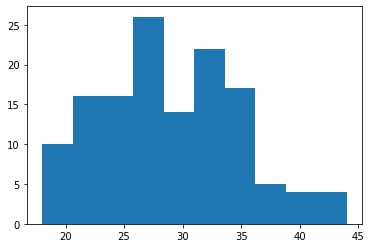

In [467]:
plt.hist(lengths)

# Final Check of Loci

In [468]:
final_check = pd.read_csv("final_list/map_oncRNAs.bed", sep="\t", header=None)
print(final_check.shape)
final_check.head(2)

(134, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,chr20,50583926,50583951,chr20:50583926-50583951:+,.,+,chr20,50583874,50583980,chr20:50583874-50583980:+,.,+,25
1,chr20,50583905,50583926,chr20:50583905-50583926:+,.,+,chr20,50583874,50583980,chr20:50583874-50583980:+,.,+,21


In [344]:
j = 0

In [470]:
j = 96

130
chr1:43164358-43164482:-
chr1:43164424-43164450:-
26


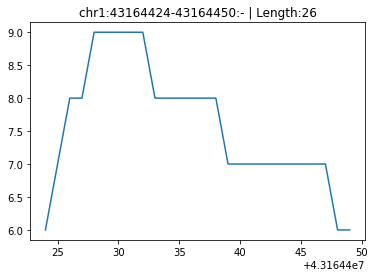

In [505]:
oncRNA = final_check.iloc[j]
new_start = oncRNA[1]
new_end = oncRNA[2]

locus = oncRNA[9]
splits = locus.split(":")
ref = splits[0]
start = int(splits[1].split("-")[0])
end = int(splits[1].split("-")[1])
strand = splits[2]
coverage = np.array(loci_coverage_dict[locus])[new_start-start:new_end-start]
coord = np.arange(new_start, new_end)
density_df = pd.DataFrame({"Coord":coord, "Coverage":coverage})
plt.plot(density_df["Coord"], density_df["Coverage"])
plt.title(oncRNA[3] + f" | Length:{new_end - new_start}")
print(j)
print(oncRNA[9])
print(f"{ref}:{new_start}-{new_end}:{strand}")
print(new_end-new_start)
j += 1

At this step we removed one whole loci and one splitted locus due to low coverage by genome coverage of the samples.

## Convert to fastq sequences file

In [506]:
%%bash
echo "bedtools getfasta -fo final_list/final_oncRNA.fa -fi /rumi/shams/genomes/hg38/hg38.fa -bed final_list/refined_oncRNA_list.bed -s";
bedtools getfasta -fo final_list/final_oncRNA.fa -fi /rumi/shams/genomes/hg38/hg38.fa -bed final_list/refined_oncRNA_list.bed -s

bedtools getfasta -fo final_list/final_oncRNA.fa -fi /rumi/shams/genomes/hg38/hg38.fa -bed final_list/refined_oncRNA_list.bed -s


In [507]:
with open('final_list/final_oncRNA.txt', "w") as out:
    with open("final_list/final_oncRNA.fa", "r") as read:
        for line in read:
            if ">" not in line:
                out.write(line)

# Annotations
Make sure none of these finalized oncRNAs map to a known smRNAs. Below code should return 0 results.

In [508]:
%%bash
bedtools intersect -wo -s -a final_list/refined_oncRNA_list.bed -b /rumi/shams/jwang/genomes/hg38/dashr.v2.smRNA.hg38.bed

Promising ones: chr17:38604595-38604621:-


# Done